<a href="https://colab.research.google.com/github/anirudhkashibhatla/crypto/blob/main/sentence-similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [434]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer,util
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import DBSCAN
from sentence_transformers.util import community_detection
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
with open('/content/extensionStorage.json', 'r') as f:
    data = json.load(f)

json_names = list(data.keys())
print("Top-level JSON names:", json_names)
json_sizes = {key: len(value) if isinstance(value, dict) else 0 for key, value in data.items()}

sorted_by_keys = dict(sorted(json_sizes.items(), key=lambda item: item[1],reverse = True))
sorted_by_keys
relevant = list(sorted_by_keys.keys())
print(relevant)
relevant = relevant[:4]
relevant = [relevant[0], relevant[-1]]
relevant
for key,value in data.items():
  if key in relevant:
     print(key)
     print(value)
data = {key: value for key, value in data.items() if key in relevant}
data

Top-level JSON names: ['formData', 'formDataCounts', 'https://astrazeneca.wd3.myworkdayjobs.com/en-US/Careers/details/Senior-Clinical-Research-Associate--Sr-CRA------So-Paulo-or-Rio-de-Janeiro-_R-215891', 'https://astrazeneca.wd3.myworkdayjobs.com/en-US/Careers/job/Salesforce---Sao-Paulo/Senior-Clinical-Research-Associate--Sr-CRA------So-Paulo-or-Rio-de-Janeiro-_R-215891/apply', 'https://spgi.wd5.myworkdayjobs.com/en-US/SPGI_Careers/login?redirect=%2Fen-us%2FSPGI_Careers%2Fjob%2FHyderabad-Telangana%2FData-Analyst_310792-1%2Fapply%3Futm_source%3Dlinkedin', 'https://spgi.wd5.myworkdayjobs.com/en-us/SPGI_Careers/job/Hyderabad-Telangana/Data-Analyst_310792-1/apply?utm_source=linkedin', 'https://www.google.com/search?sca_esv=c05c11496cd8066e&sxsrf=AHTn8zoPzyFOHPu_RmvYYYQaM0TGQKso2Q:1739270327433&q=mr+bean&udm=2&fbs=ABzOT_CWdhQLP1FcmU5B0fn3xuWp6IcynRBrzjy_vjxR0KoDMuRqhRxkdGgKzs52-1TZixdYkeUgOjz9KxcNKskor3Wf6jWq0B_xPJBz95EFO4SS0Z3Wte9MK5niNmZV-9csBT4bv-aOHRZvEqA9I05Y8XJJZNgZLjVQhoOnrkwiKG6um1

{'formData': {'1': '9',
  '2': '3',
  '3': '6',
  '4': '4',
  '2024': '3',
  '10715': '57',
  '\n                    Excercises filter input\n                  ': '',
  '\n                    Filter field for certifications\n                  ': '',
  '\n                    Password                ': 'q#Nf8Hz47KjsMPb',
  ' ': 'discuss particle physics and create a model that stimulates 3d particle interactions and dynamics in c++ using any  librarireas needed along with the math',
  ' Choose not to reply': 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__17976',
  ' File': 'C:\\fakepath\\Anirudh_Kashibhatla_Resume__.pdf',
  ' Male': 'com.taleo.systemcomponent.question.entity.RegulationPossibleAnswer__4205011901',
  ' No': 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__19098',
  ' Not applicable': 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__19325',
  ' Yes': 'com.taleo.functionalcomponent.prescreenin

In [435]:
embeddings = model.encode(["what is your work experience excluding internships", "how much period have you worked"])
embeddings

array([[ 3.19674350e-02,  4.48963344e-02,  2.96354219e-02,
         1.13420300e-02,  1.78942028e-02, -1.36142457e-02,
        -2.70699859e-02, -2.37095729e-02, -6.23858795e-02,
        -3.08310520e-02, -7.01392116e-03,  5.15761971e-03,
         6.13437556e-02, -3.07480898e-02, -7.04440475e-02,
         1.60166528e-02,  2.24253982e-02, -5.56186736e-02,
         4.71007824e-02, -1.55279279e-01, -4.43157107e-02,
        -7.55909458e-02,  7.76415467e-02, -1.92198437e-02,
         4.38821092e-02,  5.79957925e-02, -1.99571345e-02,
         6.92228153e-02, -2.23634560e-02, -4.01010811e-02,
        -2.98139136e-02,  1.60291903e-02,  8.08411557e-03,
         4.04315349e-03,  7.29259923e-02,  1.11771010e-01,
         3.50532085e-02,  1.70937758e-02,  8.27505440e-02,
        -3.86026464e-02,  1.28811747e-02,  4.48325761e-02,
         4.73856404e-02, -9.79735404e-02,  5.30907437e-02,
        -1.30483761e-01, -2.78453925e-03, -7.12658912e-02,
        -4.80868481e-02, -2.97704842e-02,  3.86341400e-0

In [436]:
similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1])
similarity

tensor([[0.3372]])

In [437]:
data1 = {}
for key,value in data.items():
      for a,b in value.items():
        data1[a] = b
print(data1)
data1list = list(data1.items())
dfdata1 = pd.DataFrame(data1list, columns=['Key', 'Value'])

{'1': '9', '2': '3', '3': '6', '4': '4', '2024': '3', '10715': '57', '\n                    Excercises filter input\n                  ': '', '\n                    Filter field for certifications\n                  ': '', '\n                    Password                ': 'q#Nf8Hz47KjsMPb', ' ': 'discuss particle physics and create a model that stimulates 3d particle interactions and dynamics in c++ using any  librarireas needed along with the math', ' Choose not to reply': 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__17976', ' File': 'C:\\fakepath\\Anirudh_Kashibhatla_Resume__.pdf', ' Male': 'com.taleo.systemcomponent.question.entity.RegulationPossibleAnswer__4205011901', ' No': 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__19098', ' Not applicable': 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__19325', ' Yes': 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__19337', '

705

In [438]:
dfdata1.head(50)

,Key,Value
0,1,9
1,2,3
2,3,6
3,4,4
4,2024,3
5,10715,57
6,\n Excercises filter input\...,
7,\n Filter field for certifi...,
8,\n Password,q#Nf8Hz47KjsMPb
9,,discuss particle physics and create a model th...


In [439]:
data2 = {}
for key,value in data1.items():
  data2[value] = key
data2list = list(data2.items())
dfdata2 = pd.DataFrame(data2list, columns=['Value', 'Key'])
x = [keys for key,value in data2.items()]
len(x)

243

In [440]:
dfdata2.head(50)
dfdata2['Value_Length'] = dfdata2['Value'].astype(str).apply(len) # Create a temporary column for length to avoid data type issues
dfdata2.sort_values(by=['Value_Length'], inplace=True) # Sort by length then drop the temporary column
dfdata2.drop(columns=['Value_Length'], inplace=True)
dfdata2 = dfdata2[:-1]
print(dfdata2.shape)
dfdata2.tail(50)


(242, 2)


,Value,Key
215,give me this code in chat,mat-input-6
217,Sairam Anirudh Kashibhatla,memberName
184,"Yes, by way of citizenship",cards[b937576d-7460-40d2-ae79-762f158be671][fi...
28,meenakumarimanyam@gmail.com,:1gi
35,sr922003@student.nitw.ac.in,Alternate Email ID37414
19,anirudhkashibhatla@gmail.com,email
169,Available to join immediately,What is your notice period?\nWhat is your noti...
34,", B lane, DD Colony, Amberpet",Address Line 2*
204,C:\fakepath\ESLII_print10.pdf,html5_1ik3o5vd617m34701csr15cck024
208,https://wsdc.nitw.ac.in/home/,s


In [441]:
keys = []
for key,value in data1.items():
  keys.append(key)
len(keys)

705

In [442]:
print(keys[38],"/",keys[39])

Address : / Address Line 1


In [443]:
data1[keys[39]]

'Flat 201, Daffodils Appt, B61, B lane, DD Colony, Amberpet'

In [444]:
embedding1 = model.encode('Address Line 1')
embedding2 = model.encode('Address :')
similarity_score = cosine_similarity([embedding1], [embedding2])
similarity

tensor([[0.3372]])

In [445]:
embeddings = model.encode(keys, show_progress_bar=True)
embeddings.shape

Batches:   0%|          | 0/23 [00:00<?, ?it/s]

(705, 384)

In [446]:
clusters = community_detection(embeddings, threshold=0.5)
print(len(clusters))
sum = 0
for cluster in clusters:
   sum += len(cluster)
print(sum)

18
382


In [447]:
for cluster in clusters:
  for i,index in enumerate(cluster):
    print(keys[index],":",data1[keys[index]])
    if i == len(cluster)-1:
      print("///")


workExperience-38--endDate-dateSectionMonth-input : 1
workExperience-33--endDate-dateSectionMonth-input : 1
workExperience-57--endDate-dateSectionMonth-input : 1
workExperience-5--endDate-dateSectionMonth-input : 1
workExperience-38--startDate-dateSectionMonth-input : 7
workExperience-38--endDate-dateSectionYear-input : 2025
workExperience-33--startDate-dateSectionMonth-input : 7
workExperience-33--endDate-dateSectionYear-input : 2025
workExperience-57--startDate-dateSectionMonth-input : 7
workExperience-57--endDate-dateSectionYear-input : 2025
workExperience-5--startDate-dateSectionMonth-input : 7
workExperience-5--endDate-dateSectionYear-input : 2025
workExperience-38--startDate-dateSectionYear-input : 2024
workExperience-33--startDate-dateSectionYear-input : 2024
input-28-dateSectionMonth-input : 7
input-31-dateSectionMonth-input : 1
input-27-dateSectionMonth-input : 1
input-23-dateSectionMonth-input : 7
workExperience-57--startDate-dateSectionYear-input : 2024
input-24-dateSectionM

In [448]:
clusterlabels = defaultdict(list)
for cluster in clusters:
  for i,index in enumerate(cluster):
    print(keys[index],":",data1[keys[index]])
    if i == len(cluster)-1:
      print("///")

workExperience-38--endDate-dateSectionMonth-input : 1
workExperience-33--endDate-dateSectionMonth-input : 1
workExperience-57--endDate-dateSectionMonth-input : 1
workExperience-5--endDate-dateSectionMonth-input : 1
workExperience-38--startDate-dateSectionMonth-input : 7
workExperience-38--endDate-dateSectionYear-input : 2025
workExperience-33--startDate-dateSectionMonth-input : 7
workExperience-33--endDate-dateSectionYear-input : 2025
workExperience-57--startDate-dateSectionMonth-input : 7
workExperience-57--endDate-dateSectionYear-input : 2025
workExperience-5--startDate-dateSectionMonth-input : 7
workExperience-5--endDate-dateSectionYear-input : 2025
workExperience-38--startDate-dateSectionYear-input : 2024
workExperience-33--startDate-dateSectionYear-input : 2024
input-28-dateSectionMonth-input : 7
input-31-dateSectionMonth-input : 1
input-27-dateSectionMonth-input : 1
input-23-dateSectionMonth-input : 7
workExperience-57--startDate-dateSectionYear-input : 2024
input-24-dateSectionM

In [449]:
embedding_store = {}
key_to_index = {}
for index, key in enumerate(keys):
    embedding = model.encode(key, show_progress_bar=False)
    embedding_store[index] = embedding  #
    key_to_index[key] = index
key_to_index

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '2024': 4,
 '10715': 5,
 '\n                    Excercises filter input\n                  ': 6,
 '\n                    Filter field for certifications\n                  ': 7,
 '\n                    Password                ': 8,
 ' ': 9,
 ' Choose not to reply': 10,
 ' File': 11,
 ' Male': 12,
 ' No': 13,
 ' Not applicable': 14,
 ' Yes': 15,
 ' Yes - I currently hold a PAN card.': 16,
 '*\n\xa0Address Line 1': 17,
 '*\n\xa0City': 18,
 '*\n\xa0Country': 19,
 '*\n\xa0Degree': 20,
 '*\n\xa0Email Address': 21,
 '*\n\xa0In the future, will you require sponsorship from Moody’s to work within the country to which you are applying?': 22,
 '*\n\xa0Legal First Name': 23,
 '*\n\xa0Legal Last Name': 24,
 '*\n\xa0Primary Contact Number': 25,
 '*I have read and agree to the Employee Candidate\xa0Privacy Statement\n': 26,
 '*Passcode:': 27,
 '11 - 13 LPA': 28,
 '6months - 2years': 29,
 ':1gi': 30,
 ':r0:': 31,
 ':r1:': 32,
 'A Pandas Series': 33,
 'Access passw

In [495]:
clustersim = []
for cluster in clusters:
  values =[data1[keys[x]] for x in cluster]
  #print(values)
  sim = similarity_list_value(values)
  print(sim)
  clustersim.append(sim)
#clustersim


[0.582302987575531, 0.2989356815814972]
[0.6873805522918701, 0.28398260474205017]
[0.5635839700698853, 0.39076825976371765]
[0.6392470598220825, 0.322564959526062]
[0.5325607061386108, 0.379258930683136]
[0.5795403122901917, 0.2801763415336609]
[0.44075509905815125, 0.27279332280158997]
[0.8288729786872864, 0.32846710085868835]
[0.25827038288116455, 0.22819258272647858]
[0.7874010801315308, 0.250448077917099]
[0.7494634389877319, 0.31915539503097534]
[0.5746560096740723, 0.35079237818717957]
[0.3812091648578644, 0.2901642918586731]
[0.2890462577342987, 0.20658743381500244]
[0.24445900321006775, 0.20426629483699799]
[0.27826350927352905, 0.29009196162223816]
[0.5650362372398376, 0.4216561019420624]
[0.2902366518974304, 0.2149137258529663]


In [450]:
keys_by_value = defaultdict(list)
for key, value in data1.items():
    keys_by_value[value].append(key)
keys_list = list(keys_by_value.keys())
keys_list



['9',
 '3',
 '6',
 '4',
 '57',
 '',
 'q#Nf8Hz47KjsMPb',
 'discuss particle physics and create a model that stimulates 3d particle interactions and dynamics in c++ using any  librarireas needed along with the math',
 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__17976',
 'C:\\fakepath\\Anirudh_Kashibhatla_Resume__.pdf',
 'com.taleo.systemcomponent.question.entity.RegulationPossibleAnswer__4205011901',
 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__19098',
 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__19325',
 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__19337',
 'com.taleo.functionalcomponent.prescreening.entity.question.PossibleAnswer__46057',
 'DAFFODILS APTS,DD COLNY',
 'Hyderabad',
 'India',
 'Bachelor',
 'anirudhkashibhatla@gmail.com',
 'No',
 'Anirudh',
 'Kashibhatla',
 '+917093615572',
 'on',
 '872554',
 '201132701002',
 '1',
 'meenakumarimanyam@gmail.com',
 '

In [451]:
keys_by_value

defaultdict(list,
            {'9': ['1', 'Thickness'],
             '3': ['2',
              '2024',
              'Associate\nFilter by Associate',
              'otc-1',
              'otc-2',
              'otc-6'],
             '6': ['3',
              'Education Level\n\xa0\n.\xa0\nRequired',
              'End date month*',
              'expMonths',
              'relevantExpMonths',
              'workExperience.months'],
             '4': ['4',
              'Others',
              'RACE/ETHNICITY / RAZA/ETNICIDAD',
              'less than 6 months',
              'otc-3'],
             '57': ['10715'],
             '': ['\n                    Excercises filter input\n                  ',
              '\n                    Filter field for certifications\n                  ',
              ':r0:',
              'Company*',
              'Employer\n\xa0\n.\xa0\nRequired',
              'Filter by ID/IP',
              'How many years of work experience do you have with Data

In [452]:
sorted_keys_by_value = dict(sorted(keys_by_value.items(), key=lambda item: len(item[1]), reverse=True))

for key, value in sorted_keys_by_value.items():
    print(f"{key}: {len(value)}")

0: 51
on: 49
anirudhkashibhatla@gmail.com: 22
1: 21
2024: 20
Hyderabad: 17
1020000: 16
0.5: 16
: 15
Yes: 15
7093615572: 15
Anirudh: 12
2020: 12
C:\fakepath\Anirudh_Kashibhatla_Resume__.pdf: 11
No: 11
Kashibhatla: 10
https://www.linkedin.com/in/anirudhkashibhatla/: 9
2025: 9
Flat 201, Daffodils Appt, B61, B lane, DD Colony, Amberpet: 8
10.2: 8
7: 8
38: 7
Futures First: 7
Anirudh Kashibhatla: 7
C:\fakepath\Anirudh_Kashibhatla__Resume_.pdf: 7
3: 6
6: 6
IN: 6
500013: 6
4: 5
+917093615572: 5
07093615572: 5
Metallurgical Engineering: 5
8: 5
2: 4
37: 4
-: 4
Guruji$1: 4
C:\fakepath\Anirudh_Kashibhatla_Resume_.pdf: 4
Market Analyst: 4
+91: 4
10: 4
7.19: 3
234: 3
Kashibhatla : 3
Anirudh : 3
Male: 3
National Institute of Technology Warangal: 3
anirudhbzgh: 3
102103896453: 3
9030077232: 3
9: 2
India: 2
yes: 2
Engineering: 2
Hyderabad : 2
C:\fakepath\Anirudh_Kashibhatla_CV_.pdf: 2
10,20,000: 2
417894747994: 2
com.taleo.systemcomponent.olf.entity.NetworkLocation__54300: 2
453: 2
Mobile: 2
data scien

In [453]:
print(keys_by_value[keys_list[21]])

['*\n\xa0Legal First Name', 'First Name', 'First Name*', 'First Name37410', 'First Name: *', 'First name ', 'First name:', 'Given Name(s)\n*', 'Given Name*', 'Legal First Name *', 'Legal first name *', 'Pronouns']


In [454]:
print(len(keys_list))
keys_by_value['2024']

243


['Year of Graduation',
 'Year of Passing37441',
 'education-28--lastYearAttended-dateSectionYear-input',
 'education-47--lastYearAttended-dateSectionYear-input',
 'education-66--lastYearAttended-dateSectionYear-input',
 'education-73--lastYearAttended-dateSectionYear-input',
 'education-93--lastYearAttended-dateSectionYear-input',
 'input-104-dateSectionYear-input',
 'input-21-dateSectionYear-input',
 'input-23-dateSectionYear-input',
 'input-24-dateSectionYear-input',
 'input-28-dateSectionYear-input',
 'input-35-dateSectionYear-input',
 'input-45-dateSectionYear-input',
 'input-46-dateSectionYear-input',
 'workExperience-33--startDate-dateSectionYear-input',
 'workExperience-38--startDate-dateSectionYear-input',
 'workExperience-5--startDate-dateSectionYear-input',
 'workExperience-57--startDate-dateSectionYear-input',
 'input-80-dateSectionYear-input']

In [455]:
map = defaultdict(list)
for key,value in keys_by_value.items():
  if len(value) > 1:
      map[key] = evaluate(value)

map



defaultdict(list,
            {'9': [np.float64(0.23247310519218445), np.float64(0.0), 0, 0],
             '3': [np.float64(0.3291667451461156),
              np.float64(0.29275934383064783),
              3,
              0],
             '6': [np.float64(0.24713859210411707),
              np.float64(0.14554185060989167),
              2,
              1],
             '4': [np.float64(0.1327511478215456),
              np.float64(0.10987400019195676),
              0,
              0],
             '': [np.float64(0.16985680215238105),
              np.float64(0.12909660634373002),
              2,
              0],
             'C:\\fakepath\\Anirudh_Kashibhatla_Resume__.pdf': [np.float64(0.30537797612222756),
              np.float64(0.19714611702295595),
              1,
              0],
             'Hyderabad': [np.float64(0.446357957813341),
              np.float64(0.28761027361724284),
              0,
              0],
             'India': [np.float64(0.5928062200546265),

In [476]:

data_list = []
for key, value in map.items():
    data_list.append({'Key': key, 'Mean': value[0], 'Std': value[1], 'High_Confidence': value[2], 'Low_Confidence': value[3]})

dfmap = pd.DataFrame(data_list)
dfmap.set_index('Key', inplace=True)
dfmap.sort_values(by='Mean', ascending=False, inplace=True)
dfmap

,Mean,Std,High_Confidence,Low_Confidence
Key,,,,
Mobile,1.000000,0.000000,0,0
aditya.rama-kamalanath-polepeddi@michelin.com,0.915402,0.000000,0,0
500013,0.875031,0.069210,0,0
2078,0.871712,0.000000,0,0
"Flat 201, Daffodils Appt, B61, B lane, DD Colony, Amberpet",0.769311,0.166401,0,0
...,...,...,...,...
8,0.167327,0.108124,1,0
on,0.139313,0.150590,63,0
0453,0.135842,0.000000,0,0


In [482]:
def similarity_list(value):
  arr = []
  for i in range(len(value)):
        for j in range(i + 1, len(value)):
            # Check if keys exist in key_to_index before accessing
            if value[i] in key_to_index and value[j] in key_to_index:
                embedding1 = embedding_store[key_to_index[value[i]]]
                embedding2 = embedding_store[key_to_index[value[j]]]
                similarity_score = util.pytorch_cos_sim(embedding1, embedding2).item()
                arr.append(similarity_score)
            #else:
                #print(f"Key not found in key_to_index: {value[i]} or {value[j]}")  # Optional: Print missing keys for debugging
  return arr

In [494]:
def similarity_list_value(sentences):
    embeddings = model.encode(sentences, show_progress_bar=False)
    similarity_matrix = cosine_similarity(embeddings)
    upper_triangle = similarity_matrix[np.triu_indices(len(sentences), k=1)]
    mean = np.mean(upper_triangle).item()
    std = np.std(upper_triangle).item()

    return [mean, std]

In [459]:
for key,value in keys_by_value.items():
  print(similarity_list(value))

[0.23247310519218445]
[0.2881011366844177, -0.0010506696999073029, 0.2790120840072632, 0.36680227518081665, 0.2891983389854431, 0.0366072915494442, 0.19734828174114227, 0.2441662847995758, 0.2309902012348175, 0.1221284419298172, 0.11697723716497421, 0.12078537046909332, 0.9059735536575317, 0.8677979707717896, 0.8726633787155151]
[0.2450522929430008, 0.1249811202287674, 0.26541703939437866, 0.23221975564956665, 0.1920594722032547, 0.0023288503289222717, 0.13403157889842987, 0.19056203961372375, 0.21681120991706848, 0.27126455307006836, 0.13051185011863708, 0.5174843668937683, 0.6059602499008179, 0.3266943693161011, 0.25170013308525085]
[0.2911004424095154, 0.11094601452350616, 0.16707897186279297, 0.31668251752853394, 0.1904752552509308, -0.009369846433401108, 0.10323939472436905, -0.044686950743198395, 0.06737165153026581, 0.13467402756214142]
[]
[0.4709843397140503, 0.10921996831893921, 0.0391678661108017, 0.06322383135557175, 0.3539942502975464, 0.08178568631410599, 0.172615766525268

In [ ]:
def kde (values)

In [ ]:
import pandas as pd

# Create a list of dictionaries to store the data for the DataFrame
d = []
for key, value in keys_by_value.items():
    d.append({'Key': key, 'Value_List_Length': len(value)})

# Create the DataFrame
df = pd.DataFrame(d)
df.set_index('Key', inplace=True)  # Set 'Key' as the index

# Display the DataFrame
c = df.sort_values(by='Value_List_Length', ascending=False)
c.head(75)

In [ ]:
from matplotlib import pyplot as plt
_df_0['Value_List_Length'].plot(kind='hist', bins=20, title='Value_List_Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

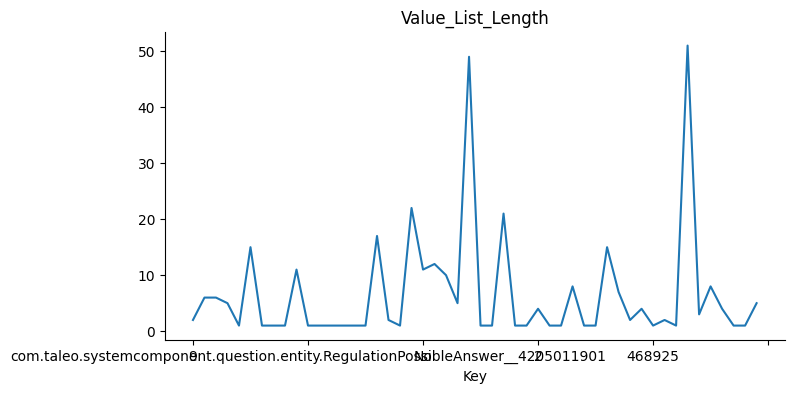

In [468]:
from matplotlib import pyplot as plt
_df_1['Value_List_Length'].plot(kind='line', figsize=(8, 4), title='Value_List_Length')
plt.gca().spines[['top', 'right']].set_visible(False)

In [470]:
def evaluate(value):
    cos = similarity_list(value)
    if not cos:
        return []
    mean, std = np.mean(cos), np.std(cos)
    print("mean :",mean,std)
    q1, q3 = np.percentile(cos, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print("asd",lower_bound,upper_bound)
    #clean_scores = [s for s in cos if lower_bound <= s <= upper_bound]
    #high_confidence_predictions = [s for s in cos if s > upper_bound]
    #low_confidence_predictions = [s for s in cos if s < lower_bound]
    high_confidence= len([s for s in cos if s > upper_bound])
    low_confidence= len([s for s in cos if s < lower_bound])
    print (high_confidence,low_confidence)
    #skew = stats.skew(clean_scores)
    #kurt = stats.kurtosis(clean_scores)

    return [mean, std, high_confidence, low_confidence]





In [471]:
x = keys_by_value[keys_list[21]]
evaluate(x)

mean : 0.6427653280623031 0.21101574906662615
asd 0.19417303055524826 1.1226050779223442
0 0


[np.float64(0.6427653280623031), np.float64(0.21101574906662615), 0, 0]

In [ ]:
x = keys_by_value[keys_list[21]]
cos = []
for i in range(len(x)):
  for j in range(i+1,len(x)):
    embedding1 = embedding_store[key_to_index[x[i]]]
    embedding2 = embedding_store[key_to_index[x[j]]]
    similarity_score = util.pytorch_cos_sim(embedding1, embedding2).item()
    cos.append(similarity_score)
val = np.mean(cos)
print(val)
plt.hist(cos,bins = 20)  # Adjust the number of bins as needed
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Cosine Similarity")
plt.show()

In [ ]:
x = keys_by_value['0']
cos = []
for i in range(len(x)):
  for j in range(i+1,len(x)):
    embedding1 = embedding_store[key_to_index[x[i]]]
    embedding2 = embedding_store[key_to_index[x[j]]]
    similarity_score = util.pytorch_cos_sim(embedding1, embedding2).item()
    cos.append(similarity_score)
val = np.mean(cos)
print(val)
plt.hist(cos,bins = 50)  # Adjust the number of bins as needed
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Cosine Similarity")
plt.show()
print(len(cos))

In [ ]:
x = keys_by_value['anirudhkashibhatla@gmail.com']
cos = []
for i in range(len(x)):
  for j in range(i+1,len(x)):
    embedding1 = embedding_store[key_to_index[x[i]]]
    embedding2 = embedding_store[key_to_index[x[j]]]
    similarity_score = util.pytorch_cos_sim(embedding1, embedding2).item()
    cos.append(similarity_score)
val = np.mean(cos)
print(val)
plt.hist(cos,bins = 40)  # Adjust the number of bins as needed
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Cosine Similarity")
plt.show()
print(len(cos))

In [ ]:
keys_by_value['anirudhkashibhatla@gmail.com']